In [13]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor


In [229]:
data = pd.read_csv('insurance.csv')

### Business Problem
An insurance company wants to improve its cash flow forecasting by better predicting patient charges using demographic and basic patient health risk metrics at the time of hospitalization.

In [230]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

###  Model Training and Validation

Model training is carried out using Pycaret with some preprocessings.

Scaling and normalized the values. automatic feature engineering and binning continuous data of age and bmi into intervals.

In [5]:
from pycaret.regression import *

In [6]:
model = setup(data, target = 'charges', session_id = 111,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,111
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 57)"


In [21]:
data_transformed = get_config('X')
y_transformed = get_config('y')

In [28]:
X_train_transformed = get_config('X_train')
X_test_transformed = get_config('X_test')
y_train_transformed = get_config('y_train')
y_test_transformed = get_config('y_test')


In [129]:
X_train_transformed.shape

(936, 57)

In [7]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2791.0652,20783288.0000,4558.8691,0.8376,0.4980,0.3062
1,3729.0166,40274752.0000,6346.2393,0.6507,0.4959,0.2878
2,2743.9341,18929606.0000,4350.8169,0.8714,0.3929,0.3077
3,2936.2815,26422222.0000,5140.2549,0.8158,0.5012,0.3065
4,3344.8823,39910660.0000,6317.4883,0.7633,0.4637,0.2843
5,2621.5425,19423848.0000,4407.2495,0.8840,0.4021,0.2808
6,2308.8491,13656800.0000,3695.5107,0.9101,0.3233,0.2956
7,2443.4119,15794007.0000,3974.1675,0.8690,0.3834,0.2784
8,2953.2634,21202388.0000,4604.6050,0.8177,0.4905,0.3184
9,2682.6931,20202080.0000,4494.6724,0.8674,0.4072,0.3022


In [8]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2606.2274,22235988.9118,4658.5816,0.8380,0.4338,0.3026,0.1080
lasso,Lasso Regression,2841.5264,23623742.8000,4785.5222,0.8290,0.4366,0.2949,0.0220
ridge,Ridge Regression,2846.1891,23621242.7000,4787.5945,0.8290,0.4271,0.2962,0.0160
lr,Linear Regression,2855.4940,23659965.1000,4788.9874,0.8287,0.4358,0.2968,0.0170
br,Bayesian Ridge,2856.2455,23659709.5775,4793.1946,0.8287,0.4247,0.2980,0.0180
omp,Orthogonal Matching Pursuit,2884.0974,23772580.5284,4818.3182,0.8279,0.4167,0.3075,0.0120
lightgbm,Light Gradient Boosting Machine,2903.9268,23693912.4481,4818.2137,0.8276,0.5409,0.3521,0.3880
catboost,CatBoost Regressor,2744.7722,23803076.2952,4818.7334,0.8271,0.4568,0.3200,2.4620
rf,Random Forest Regressor,2672.8942,23953181.5265,4846.4802,0.8260,0.4436,0.3043,0.3500
huber,Huber Regressor,1810.1675,24924488.4187,4908.7600,0.8201,0.3730,0.0750,0.0810


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=111, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
GBR = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2349.2756,18861583.2511,4342.9924,0.8526,0.4618,0.2777
1,3508.3903,40718783.6190,6381.1271,0.6468,0.4691,0.2903
2,2554.2327,17913926.6566,4232.4847,0.8783,0.4373,0.3512
3,2523.9112,24443494.4970,4944.0363,0.8296,0.4620,0.3033
4,2826.7291,30583400.4833,5530.2261,0.8186,0.4365,0.2548
5,2620.9864,19172667.0723,4378.6604,0.8855,0.4251,0.2593
6,2476.8311,16705552.1037,4087.2426,0.8900,0.4272,0.3992
7,2203.2814,14479170.3678,3805.1505,0.8799,0.3947,0.2987
8,2536.7869,20617984.6220,4540.7031,0.8227,0.4271,0.3224
9,2461.8489,18863326.4451,4343.1931,0.8762,0.3972,0.2693


In [12]:
tune_model(GBR)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2484.9620,19506875.6232,4416.6589,0.8475,0.4498,0.2666
1,3551.4378,41018052.1875,6404.5337,0.6442,0.4797,0.3047
2,2608.4842,17155160.3060,4141.8788,0.8835,0.4569,0.3776
3,2673.7701,25409017.6127,5040.7358,0.8229,0.4734,0.2949
4,2690.0497,30496392.4303,5522.3539,0.8191,0.4067,0.2146
5,2637.7710,20263131.7684,4501.4588,0.8790,0.4226,0.2906
6,2464.3922,17599557.8527,4195.1827,0.8841,0.4256,0.3958
7,2379.9901,16748818.9841,4092.5321,0.8611,0.4175,0.3079
8,2771.6422,21905955.2649,4680.3798,0.8116,0.4515,0.3442
9,2696.1091,20510941.5704,4528.9007,0.8654,0.4644,0.3247


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.069, loss='ls',
                          max_depth=6, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.4, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=70,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=111, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Residual plot of Gradient Boost prediction 

In [187]:
params = {'n_estimators': 70,
          'alpha' :0.9,
          'max_depth': 6,
          'min_samples_split': 9,
          'max_features':1.0,
          'min_samples_leaf' :4,
          'learning_rate': 0.069,
          'loss': 'ls',
         'subsample':0.7,
         'min_impurity_decrease':0.4}
params_1 = {
          'max_depth': 6,
          'min_samples_split': 9,
          'max_features':1.0,
          'min_samples_leaf' :4,
          'learning_rate': 0.069,
          'loss': 'ls',
         'subsample':0.7,
         'min_impurity_decrease':0.4}
GBR_model = GradientBoostingRegressor(**params)
GBR_model.fit(X_train_transformed, y_train_transformed)
GBR_model_1 = GradientBoostingRegressor(**params_1)

In [189]:
y = data['charges']

In [191]:
GBR_model_1.fit(df, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.069, loss='ls',
                          max_depth=6, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.4, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [195]:
#GBR_model_1.predict(X_test_transformed)

In [39]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test_transformed, GBR_model.predict(X_test_transformed))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 22765167.5099


In [114]:
import pickle
model = pickle.dump(GBR_model,open('model.p','wb'))
 

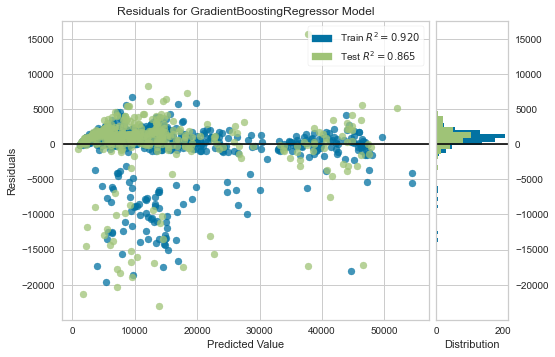

In [15]:
plot_model(GBR, plot = 'residuals')

Saving Model and Pipeline for future deployement.

In [113]:
model_GBR = pickle.dump(GBR,open('model_GBR.p','wb'))

In [115]:
save_model(GBR,'Gradient_Boosting')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

In [101]:
pipeline = get_config('prep_pipe')
pipeline = pickle.dump(GBR,open('pipeline.p','wb'))

In [104]:
pipe = get_config('prep_pipe')

In [109]:
pipeline = pickle.dump(pipe,open('pipeline.p','wb'))

In [70]:
pickle.load(open( "model.p", "rb" ))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.069, loss='ls',
                          max_depth=6, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.4, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=70,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [122]:
model = pickle.load(open( "model.p", "rb" ))
pipelines = pickle.load(open( "pipeline.p", "rb" ))

In [123]:
model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.069, loss='ls',
                          max_depth=6, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.4, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=70,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
print(pipelines)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('dummy', Dummify(target='charges')),
                ('fix_perfect', Remove_100(target='charges')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multi

In [ ]:
 pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [159]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

,age,sex,bmi,children,smoker,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,19,female,27.900,0,yes,southwest,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [172]:
enc_df = pd.DataFrame(enc.fit_transform(X[['sex','children','smoker','region']]).toarray())


In [176]:
one_hot_encode_cols = X.dtypes[X.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields
#print(one_hot_encode_cols)
X[one_hot_encode_cols].head().T

,0,1,2,3,4
sex,female,male,male,male,male
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest


In [270]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [234]:

df = pd.get_dummies(X, columns=['sex','children','smoker','region'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
sex_female,1338.0,0.494768,0.500160,0.00,0.00000,0.0,1.00000,1.00
sex_male,1338.0,0.505232,0.500160,0.00,0.00000,1.0,1.00000,1.00
children_0,1338.0,0.428999,0.495118,0.00,0.00000,0.0,1.00000,1.00
children_1,1338.0,0.242152,0.428546,0.00,0.00000,0.0,0.00000,1.00
children_2,1338.0,0.179372,0.383807,0.00,0.00000,0.0,0.00000,1.00
children_3,1338.0,0.117339,0.321945,0.00,0.00000,0.0,0.00000,1.00
children_4,1338.0,0.018685,0.135459,0.00,0.00000,0.0,0.00000,1.00
children_5,1338.0,0.013453,0.115247,0.00,0.00000,0.0,0.00000,1.00


In [275]:
#df['sex'] = 
df['sex']=pd.factorize(X['sex'])[0]
df['children']=pd.factorize(X['children'])[0]


In [283]:
df1 = X
df1['age'] = X['age']
df1['bmi'] = X['bmi']
df1['sex'] = pd.factorize(X['sex'])[0]
df1['children'] = pd.factorize(X['children'])[0]
df1['smoker'] = pd.factorize(X['smoker'])[0]
df1['region'] = pd.factorize(X['region'])[0]

In [284]:
df1

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,2,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,1,30.970,2,1,2
1334,18,0,31.920,0,1,3
1335,18,0,36.850,0,1,1
1336,21,0,25.800,0,1,0


In [66]:
pd.DataFrame(model.predict(X_test_transformed))

,0
0,19714.015023
1,36728.303599
2,8345.386052
3,10655.286031
4,8670.172572
...,...
397,17816.806491
398,14281.559312
399,44810.813594
400,8835.396435


In [198]:
X = data.drop(columns='charges',axis=1)


In [180]:
X_test_transformed.shape


(402, 57)

In [285]:
X_train = df1[:1000]

In [286]:
X_train.shape

(1000, 6)

In [287]:
X_test = df1[1000:]

In [288]:
X_test.shape


(338, 6)

In [289]:
y_train = y[:1000]
y_test = y[1000:]

In [290]:
GBR_model_1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.069, loss='ls',
                          max_depth=6, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.4, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [296]:
fit_model = pickle.dump(GBR_model_1,open('fit_model.p','wb'))

In [291]:
pred = GBR_model_1.predict(X_test)

In [292]:
pred

array([18088.04700169, 35127.25471791,  3484.02675083,  8559.70893711,
        8653.58094894,  9106.53756077,  8825.00124364, 25682.00464757,
        4821.16884274, 11532.78500922, 11243.32623186, 21724.87260726,
       14224.85524627, 10286.38633496,  8592.31916004, 14562.90446723,
        3569.91544875,  4170.76979235, 15676.24459077,  5020.43635765,
        8213.14557583, 34216.6040584 , 42188.66002355,  2069.21699968,
        9246.05224276,  2562.47605784, 18851.1153463 ,  1759.66673897,
       14701.91371752,  8330.94955468, 23457.69905648, 44995.71918326,
        4223.79921466, 14230.34589864, 11574.18752114, 12291.85463561,
       36432.02200753, 41506.12555069,  2404.2813855 ,  4823.5630558 ,
       19306.27736914,  2017.78609416, 33760.06225112,  3735.78706427,
       12972.84373208, 22966.44418323,  7700.84271789, 43163.1670286 ,
        3839.25621019, 39274.97349163, 12368.85450441, 16509.16719063,
       11365.49901243, 24981.5254666 ,  3851.70717368, 15623.06737453,
      

In [293]:
from sklearn.metrics import mean_absolute_error as ME 
from sklearn.metrics import mean_squared_error as MS
ME(pred,y_test)

2811.3773123335322

In [294]:
MS(pred,y_test)

26487903.040137917

In [295]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)    

0.8032262864060398

In [252]:
X_train.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
age,19.0,18.00,28.0,33.000,32.00,31.00,46.00,37.00,37.00,60.00,...,26.0,38.000,50.0,38.00,27.000,39.000,39.0,63.00,33.00,36.000
bmi,27.9,33.77,33.0,22.705,28.88,25.74,33.44,27.74,29.83,25.84,...,19.8,27.835,31.6,28.27,20.045,23.275,34.1,36.85,36.29,26.885
sex_female,1.0,0.00,0.0,0.000,0.00,1.00,1.00,1.00,0.00,1.00,...,1.0,1.000,1.0,0.00,1.000,1.000,1.0,1.00,1.00,1.000
sex_male,0.0,1.00,1.0,1.000,1.00,0.00,0.00,0.00,1.00,0.00,...,0.0,0.000,0.0,1.00,0.000,0.000,0.0,0.00,0.00,0.000
children_0,1.0,0.00,0.0,1.000,1.00,1.00,0.00,0.00,0.00,1.00,...,0.0,0.000,0.0,0.00,0.000,0.000,0.0,1.00,0.00,1.000
children_1,0.0,1.00,0.0,0.000,0.00,0.00,1.00,0.00,0.00,0.00,...,1.0,0.000,0.0,1.00,0.000,0.000,0.0,0.00,0.00,0.000
children_2,0.0,0.00,0.0,0.000,0.00,0.00,0.00,0.00,1.00,0.00,...,0.0,1.000,1.0,0.00,0.000,0.000,0.0,0.00,0.00,0.000
children_3,0.0,0.00,1.0,0.000,0.00,0.00,0.00,1.00,0.00,0.00,...,0.0,0.000,0.0,0.00,1.000,1.000,1.0,0.00,1.00,0.000
children_4,0.0,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.00,0.000,0.000,0.0,0.00,0.00,0.000
children_5,0.0,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.00,0.000,0.000,0.0,0.00,0.00,0.000


In [253]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [255]:
X_test = X_test.to_csv('X_test.csv')

AttributeError: 'str' object has no attribute 'to_csv'

In [260]:
ins.to_csv ('xtest.csv', index = False, header=True)

In [267]:
pd.read_csv('xtest.csv')

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [263]:
ins =data.drop(columns=['charges'])

In [266]:
ins.to_csv('XTEST.csv',index=False,header=True)